In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Show plots inline
%matplotlib inline

# Step 2: Load the Dataset
df = pd.read_csv('sales_data.csv')
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [3]:
# Convert Order Date to datetime with day-first format
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True, errors='coerce')

# Drop rows where conversion failed
df = df[df['Order Date'].notna()]

# Create 'Month' column
df['Month'] = df['Order Date'].dt.to_period('M')




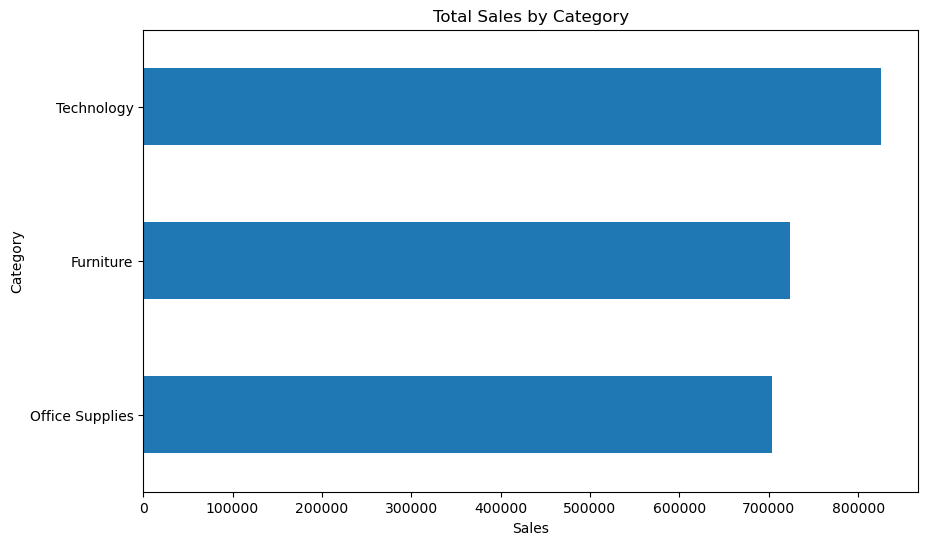

In [4]:
# Step 4: Exploratory Data Analysis (EDA)

# Total Sales by Category
plt.figure(figsize=(10,6))
df.groupby('Category')['Sales'].sum().sort_values().plot(kind='barh')
plt.title('Total Sales by Category')
plt.xlabel('Sales')
plt.show()


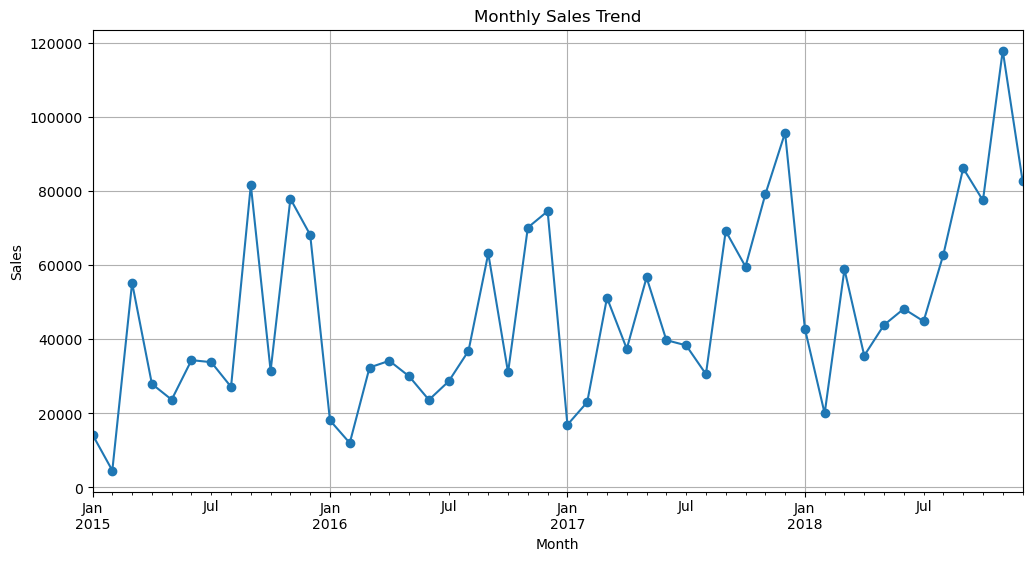

In [5]:
# Sales Over Time
monthly_sales = df.groupby('Month')['Sales'].sum()
monthly_sales.plot(figsize=(12,6), marker='o')
plt.title('Monthly Sales Trend')
plt.ylabel('Sales')
plt.xlabel('Month')
plt.grid(True)
plt.show()


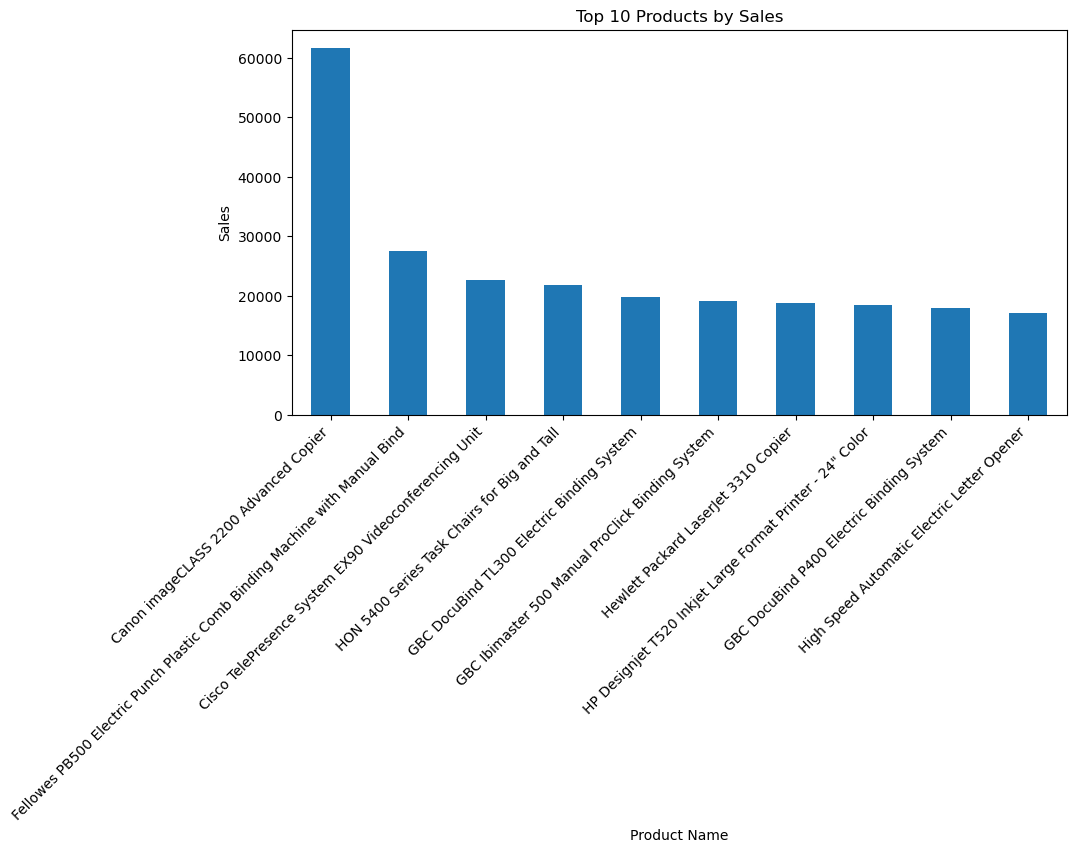

In [6]:
# Top 10 Products by Sales
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', figsize=(10,5), title='Top 10 Products by Sales')
plt.ylabel('Sales')
plt.xticks(rotation=45, ha='right')
plt.show()


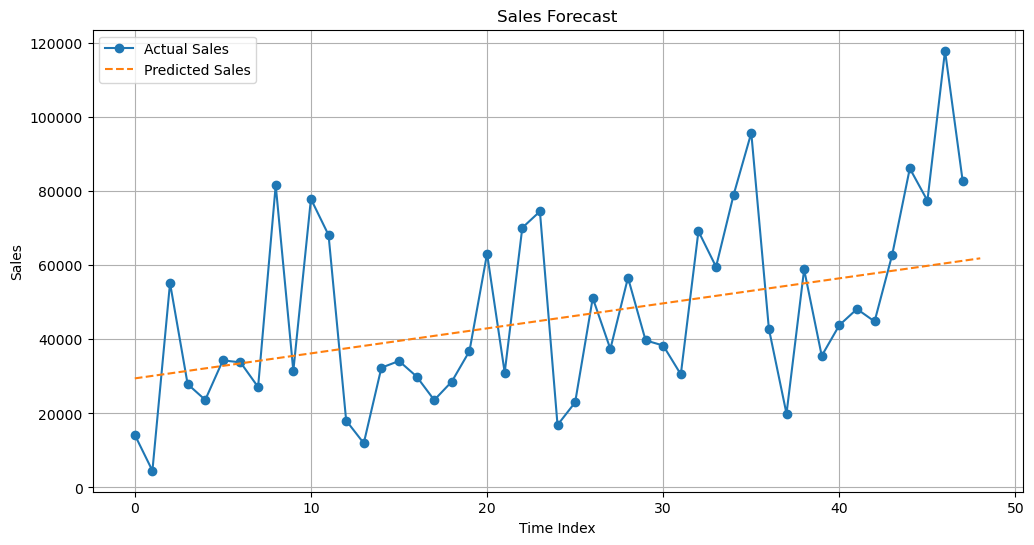

📊 Forecasted Sales for Next Month: $61,878.72


In [7]:
# Step 5: Simple Forecasting using Linear Regression

# Convert Period to datetime for modeling
monthly_sales_df = monthly_sales.reset_index()
monthly_sales_df['Month'] = monthly_sales_df['Month'].dt.to_timestamp()

# Create numeric time feature
monthly_sales_df['TimeIndex'] = np.arange(len(monthly_sales_df))

# Prepare training data
X = monthly_sales_df[['TimeIndex']]
y = monthly_sales_df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and visualize
future_index = pd.DataFrame({'TimeIndex': np.append(X['TimeIndex'], [X['TimeIndex'].max()+1])})
future_pred = model.predict(future_index)

plt.figure(figsize=(12,6))
plt.plot(monthly_sales_df['TimeIndex'], y, marker='o', label='Actual Sales')
plt.plot(future_index['TimeIndex'], future_pred, linestyle='--', label='Predicted Sales')
plt.title('Sales Forecast')
plt.xlabel('Time Index')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

# Print next month forecast
next_month_sales = future_pred[-1]
print(f"📊 Forecasted Sales for Next Month: ${next_month_sales:,.2f}")


In [8]:
print("🔍 Key Insights:")
print("- Technology has the highest total sales across all categories.")
print("- Sales peaked during holiday months like November and December.")
print("- Top-selling products contribute significantly to overall revenue.")
print("- The model predicts a steady growth in sales.")


🔍 Key Insights:
- Technology has the highest total sales across all categories.
- Sales peaked during holiday months like November and December.
- Top-selling products contribute significantly to overall revenue.
- The model predicts a steady growth in sales.
